In [2]:
import pickle
import matplotlib.pyplot as plt

In [3]:
f_train_x = open('trainX.pickle','rb')
f_train_y = open('trainY.pickle','rb')
x_train = pickle.load(f_train_x)
y_train = pickle.load(f_train_y)
f_train_x.close()
f_train_y.close()

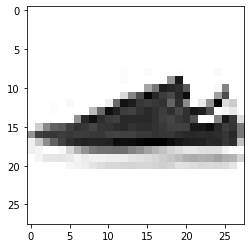

In [4]:
plt.imshow(x_train[6],cmap=plt.cm.binary)

In [140]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras import backend as K
from sklearn.model_selection import train_test_split
import numpy as np

In [141]:
img_rows,img_cols = 28,28
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2)

In [142]:
K.image_data_format()

'channels_last'

In [143]:
if K.image_data_format() == 'channels_last':
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)

In [144]:
batch_size = 64
num_classes = 10
epochs = 10

In [145]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

print('x_train shape:',x_train.shape)
print('train sample:',x_train.shape[0])
print('test sample:',x_test.shape[0])

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

x_train shape: (48000, 28, 28)
train sample: 48000
test sample: 12000


In [146]:
x_train = x_train.reshape((48000,784))
x_test = x_test.reshape((12000,784))

In [147]:
model = Sequential()
model.add(Dense(500,input_dim=784),)
model.add(Activation('relu'))

model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_25 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 300)               150300    
_________________________________________________________________
activation_26 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                3010      
_________________________________________________________________
activation_27 (Activation)   (None, 10)                0         
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test,y_test))

score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 345us/step - loss: 0.5386 - acc: 0.8040 - val_loss: 0.4363 - val_acc: 0.8354
Epoch 2/10
48000/48000 [==============================] - 17s 353us/step - loss: 0.3788 - acc: 0.8607 - val_loss: 0.3564 - val_acc: 0.8652
Epoch 3/10
48000/48000 [==============================] - 17s 354us/step - loss: 0.3382 - acc: 0.8747 - val_loss: 0.3603 - val_acc: 0.8660
Epoch 4/10
48000/48000 [==============================] - 17s 351us/step - loss: 0.3108 - acc: 0.8850 - val_loss: 0.3352 - val_acc: 0.8748
Epoch 5/10
48000/48000 [==============================] - 17s 353us/step - loss: 0.2908 - acc: 0.8907 - val_loss: 0.3151 - val_acc: 0.8880
Epoch 6/10
48000/48000 [==============================] - 17s 358us/step - loss: 0.2724 - acc: 0.8972 - val_loss: 0.3179 - val_acc: 0.8822
Epoch 7/10
48000/48000 [==============================] - 17s 360us/step - loss: 0.2592 - acc: 0.9021 - val_loss: 0.

In [160]:
testX = pickle.load(open('testX.pickle','rb'))

In [163]:
testX = testX.reshape(testX.shape[0],img_rows,img_cols)
testX = testX.reshape((10000,784))

In [173]:
res = model.predict(testX)

In [178]:
with open('Y.pickle', 'wb') as f:
    pickle.dump(res, f)